## STUDENT_SATISFACTION_FEEDBACK ANALYSIS
### This notebook presents an in-depth analysis of student feedback collected through a survey. 
### The survey data includes student ratings on various academic aspects such as course quality, lecturer effectiveness, holistic support, mentorship and overall satisfaction.
### The goal of this analysis is to identify the highly rated academic aspects and pinpoint areas where students expressed dissatisfaction and gave low ratings. 
### This will guide improvements in areas where attention and more efforts are required.

### Importing Required Python libraries.
#### These are the libraries I will use throughout this analysis, pandas for data manipulation, seaborn and matplotlib for visualizing trends and patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset containing the evaluation data.

In [160]:
students_feedback = pd.read_excel("C:/Users/hp/Downloads/Student_Satisfaction.xlsx",index_col = False)

In [161]:
students_feedback.head(3)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


### Exploring dataset to identify basic information including all column names, data types, number of rows and non-null counts in each column.

In [6]:
students_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


#### As seen above, no column has null values.

### Identifying empty entries in each column.

In [13]:
(students_feedback == '').sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

#### In the above columns, no one has an empty entry.

### Checking for duplicated rows.

In [28]:
students_feedback[students_feedback.duplicated()]

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course


#### As displayed above, no duplicated rows in the dataset.

### Splitting the "Average/Percentage" column into two separate columns, 'Average' and 'Percentage'.
#### The column is storing two diiferent metrics, average points and their percentage in one string, separating it into two columns will make analysis easier and cleaner.

In [29]:
students_feedback[["Average Rating", "Percentage"]] = students_feedback['Average/ Percentage'].str.split("/", expand = True)

In [31]:
students_feedback[["Average Rating", "Percentage"]] = students_feedback[["Average Rating", "Percentage"]].astype(float)

In [33]:
students_feedback = students_feedback.drop(columns = ["Average/ Percentage"])

In [34]:
students_feedback.head(1)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Course Name,Basic Course,Average Rating,Percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,60.0


### Grouping the Weightage Ratings By Each Question.
#### This helps us know whether most ratings lean toward satisfaction (4-5) or dissatisfaction (1-2).

In [125]:
questions_summary = students_feedback.groupby("Questions")[["Weightage 1", "Weightage 2", "Weightage 3", "Weightage 4", "Weightage 5"]].sum()
questions_summary["Questions"] = questions_summary.index

In [114]:
questions_summary.head(2)

,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Weighted Average Rating,Questions
Questions,,,,,,,
"Efforts are made by the institute/ teachers to inculcate soft skills, life skills and employability skills to make you ready for the world of work.",12,39,65,158,141,3.908434,Efforts are made by the institute/ teachers to...
Fairness of the internal evaluation process by the teachers.,10,25,51,140,189,4.139759,Fairness of the internal evaluation process by...


### Adding a New Column "Weighted Average Rating" and Calculating the Weightage Average Rating for Each Question/Statement.
#### This combines all different weightage ratings to a single score per question. It reflects how strongly people feel about a concern.

In [41]:
questions_summary["Weighted Average Rating"] = (questions_summary["Weightage 1"] *1 +
                                                questions_summary["Weightage 2"] *2 +
                                                questions_summary["Weightage 3"] *3 +
                                                questions_summary["Weightage 4"] *4 +
                                                questions_summary["Weightage 5"] *5) / questions_summary[["Weightage 1",
                                                                                         "Weightage 2",
                                                                                        "Weightage 3",
                                                                                        "Weightage 4",
                                                                                        "Weightage 5"]].sum(axis=1)

## The top 3 questions/statements which got the highest favorable feedback.

In [101]:
top3 = questions_summary.sort_values("Weighted Average Rating", ascending = False).head(3)


In [102]:
top3

,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Weighted Average Rating,Questions
Questions,,,,,,,
How well were the teachers able to communicate?,7,24,54,134,196,4.175904,How well were the teachers able to communicate?
Fairness of the internal evaluation process by the teachers.,10,25,51,140,189,4.139759,Fairness of the internal evaluation process by...
"Teachers inform you about your expected competencies, course outcomes and program\noutcomes.",13,35,51,147,169,4.021687,Teachers inform you about your expected compet...


### The bar chart below highlights the TOP 3 questions/statements that received the highest positive feedback from respondents. It helps identify the key strengths.

Text(0.5, 0, 'Weighted Average Rating')

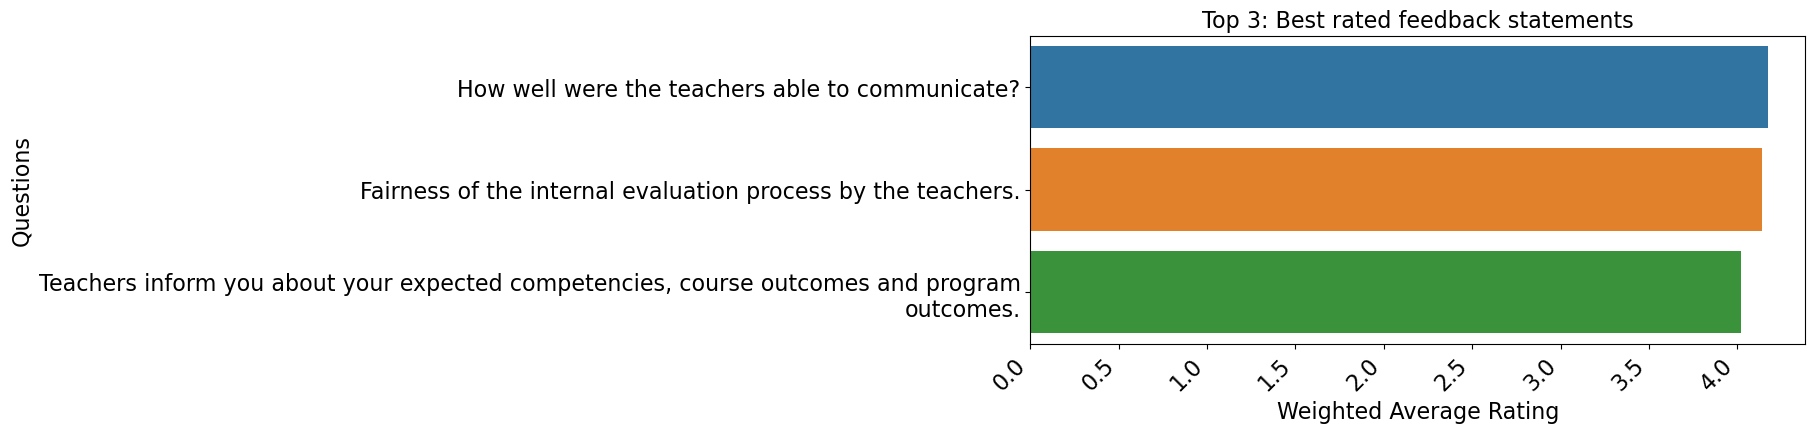

In [165]:
plt.figure(figsize = (10, 4))
sns.barplot(y="Questions", x="Weighted Average Rating", data = top3)
plt.title("Top 3: Best rated feedback statements",fontsize = 16)
plt.xticks(rotation = 45, ha = 'right', fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Questions", fontsize = 16)
plt.xlabel("Weighted Average Rating", fontsize = 16)

## As seen in the above bar chart, these items received highest satisfaction rating, signalling strong institutional strengths impacting students:
### 1. Teacher Communication (How well were the teachers able to communicate?) *4.18 / 5*
### Clear and effective communication from teachers was the most appreciated aspect by students. This suggests strong verbal clarity and student-teacher connection.
### 2.  Fairness in the internal evaluation process by teachers. *4.14 / 5*
### This indicates that students trust the integrity and transparency of the internal evaluation system.
### 3. Clarity of expectations. *4.02 / 5*
### This indicates that students feel informed and guided in their academic journey, which aligns well with outcome based education (OBE) practices.
### Communication and fairness are core strengths, students are experiencing transparency and support.

## 

## Bottom 3 Questions/Statements with the least favorable feedback

In [111]:
bottom3 = questions_summary.sort_values("Weighted Average Rating", ascending = False).tail(3)
bottom3

,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Weighted Average Rating,Questions
Questions,,,,,,,
Teachers are able to identify your weaknesses and help you to overcome them.,20,51,69,132,143,3.787952,Teachers are able to identify your weaknesses ...
"The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.",18,41,70,174,112,3.773494,The teaching and mentoring process in your ins...
"What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?",62,37,107,125,84,3.318072,What percentage of teachers use ICT tools such...


### The bar chart below highlights the BOTTOM 3 questions/statements that received the lowest average ratings from respondents. These are areas where improvements are needed, or perceptions are less favorable.

Text(0.5, 0, 'Weighted Average Rating')

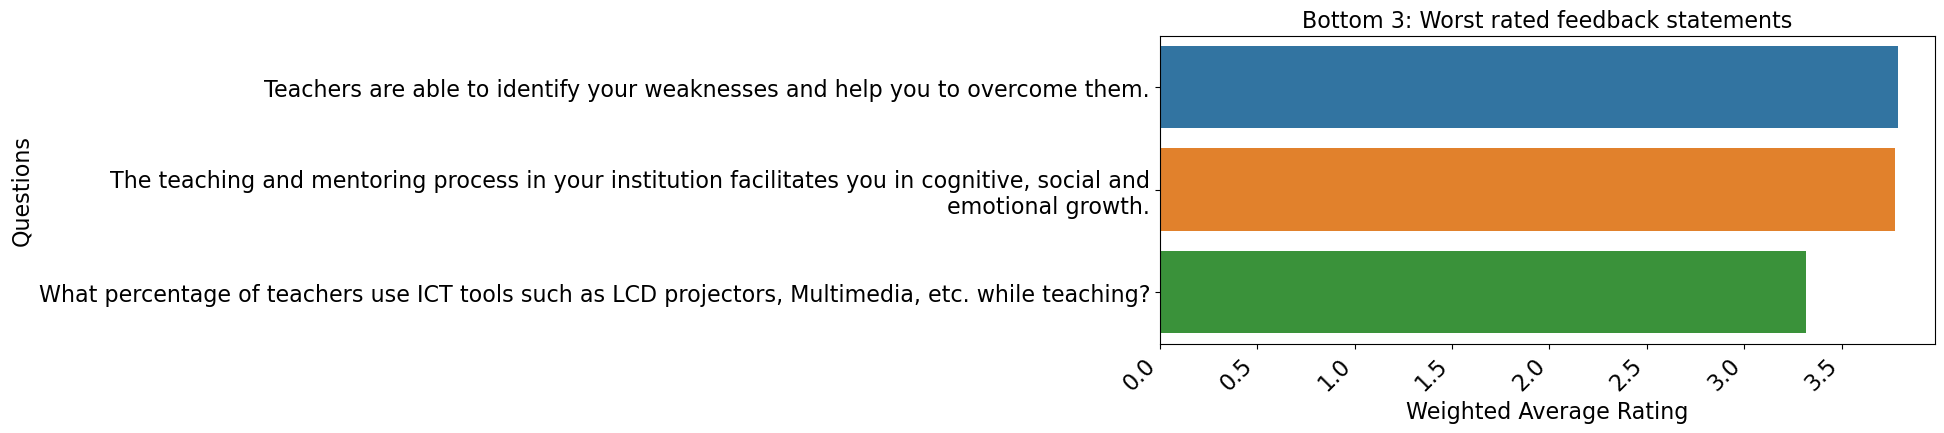

In [112]:
plt.figure(figsize= (10,4))
sns.barplot(x="Weighted Average Rating", y="Questions", data= bottom3)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.title("Bottom 3: Worst rated feedback statements", fontsize= 16)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("Questions", fontsize = 16)
plt.xlabel("Weighted Average Rating", fontsize = 16)

### As seen in the above bar chart, these questions/statements received the lowest satisfaction ratings and indicate clear opportunities for intervention:
### 1. Use of ICT tools in teaching. *3.30 / 5*
### This was the lowest rated item, suggesting that teachers rely on traditional methods of teaching with little digital engagement.
### 2.  Support for cognitive, social and emotional growth. *3.77 / 5*
### While academic delivery may be sound, students feel a lack of holistic or emotional support.
### 3. Identifying and helping in overcoming student weaknesses. *3.78 / 5*
### Indicates a need for more personalized attention, remediation plans, or mentorship.

### Poor ICT integration reflects limited digital learning practices, the institution should invest in multimedia training.
### Lack of emotional support should be handled by introducing mentorship programs and teachers should be more keen on identifying areas of struggle in their students.


###

### Comparing Feedback Scores Across Basic Courses.
#### This will be achieved by first grouping the dataset per each basic course.

In [166]:
courses = students_feedback.groupby(["Basic Course"])[["Weightage 1", "Weightage 2", "Weightage 3", "Weightage 4", "Weightage 5"]].sum()
courses["Basic Course"] = courses.index

In [167]:
courses.head(1)

,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Basic Course
Basic Course,,,,,,
B.SC. COMPUTER SCIENCE,45,98,130,155,112,B.SC. COMPUTER SCIENCE


### Adding Weighted Average Rating Column Per Course. This combines the weightages in each course into one single score.
#### This will help in identifying how good or bad is the experience of students in each course.

In [169]:
courses["Weighted Average Rating"] = (courses["Weightage 1"] *1 +
                                                courses["Weightage 2"] *2 +
                                                courses["Weightage 3"] *3 +
                                                courses["Weightage 4"] *4 +
                                                courses["Weightage 5"] *5) / courses[["Weightage 1",
                                                                                         "Weightage 2",
                                                                                        "Weightage 3",
                                                                                        "Weightage 4",
                                                                                        "Weightage 5"]].sum(axis=1)

In [170]:

courses.head(1)

,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Basic Course,Weighted Average Rating
Basic Course,,,,,,,
B.SC. COMPUTER SCIENCE,45,98,130,155,112,B.SC. COMPUTER SCIENCE,3.353704


### Sorting the courses based on the weighted average rating.

In [155]:
courses_sorted = courses.sort_values("Weighted Average Rating", ascending = False)
courses_sorted.tail(3)

,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Weighted Average Rating,Basic Course
Basic Course,,,,,,,
B.VOC FOOD TECHNOLOGY,0,3,9,5,3,3.400000,B.VOC FOOD TECHNOLOGY
B.SC. COMPUTER SCIENCE,45,98,130,155,112,3.353704,B.SC. COMPUTER SCIENCE
MSC DATA SCIENCE,8,24,43,44,1,3.050000,MSC DATA SCIENCE


### Bar Chart: Average Feedback Scores by Basic Course

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'BACHELOR OF COMMERCE (BANKING AND INSURANCE)'),
  Text(1, 0, 'MSC INFORMATION TECHNOLOGY'),
  Text(2, 0, 'BACHELOR OF ARTS'),
  Text(3, 0, 'BACHELOR OF MANAGEMENT STUDIES'),
  Text(4, 0, 'BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)'),
  Text(5, 0, 'MSC ORGANIC CHEMISTRY'),
  Text(6, 0, 'MSC COMPUTER SCIENCE'),
  Text(7, 0, 'BACHELOR OF SCIENCE'),
  Text(8, 0, 'BACHELOR OF COMMERCE'),
  Text(9, 0, 'MSC ANALYTICAL CHEMISTRY'),
  Text(10, 0, 'MSC MICROBIOLOGY'),
  Text(11, 0, 'MA PSYCHOLOGY'),
  Text(12, 0, 'MSC PHYSICS'),
  Text(13, 0, 'B.VOC FOOD TECHNOLOGY'),
  Text(14, 0, 'B.SC. COMPUTER SCIENCE'),
  Text(15, 0, 'MSC DATA SCIENCE')])

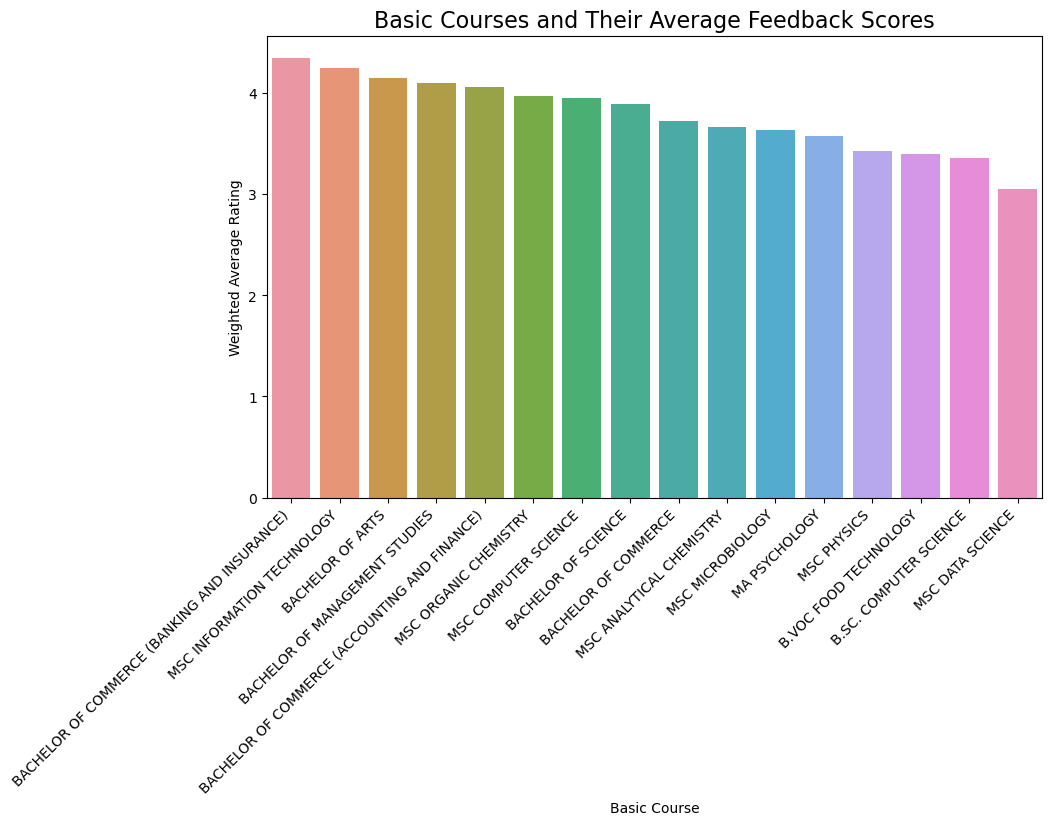

In [153]:
plt.figure(figsize = (10, 6))
sns.barplot(y="Weighted Average Rating", x="Basic Course", data = courses_sorted)
plt.title("Basic Courses and Their Average Feedback Scores", fontsize = 16)
plt.xticks(rotation = 45, ha = 'right')

### Top 3 Courses as seen in the above bar chart: Bachelor of Commerce(Banking and Insurance) - *4.35* points,
### Msc. Information Technology - *4.25* points, Bachelor of Arts - *4.14* points.
### Those programs appear to offer strong learning experiences. The high scores may be attributed to:
####    -Clear Communication.
####    -Fair Internal Processes.
####    -Structured competency outcomes.

### Bottom 3 Courses: B.Voc.Food Technology - *3.40*, Bsc. Computer Science - *3.35*, MSc. Data Science - *3.05*.
### Technical programs like Data Science and Computer Science scored the lowest, this could point to:
#### - Gaps in communication.
#### - Limited use of ICT tools.
#### - High mismatch between student expectations and delivered skills.

### 

### Heatmap: Basic Courses vs Weightage Counts

Text(95.72222222222219, 0.5, 'Basic Course')

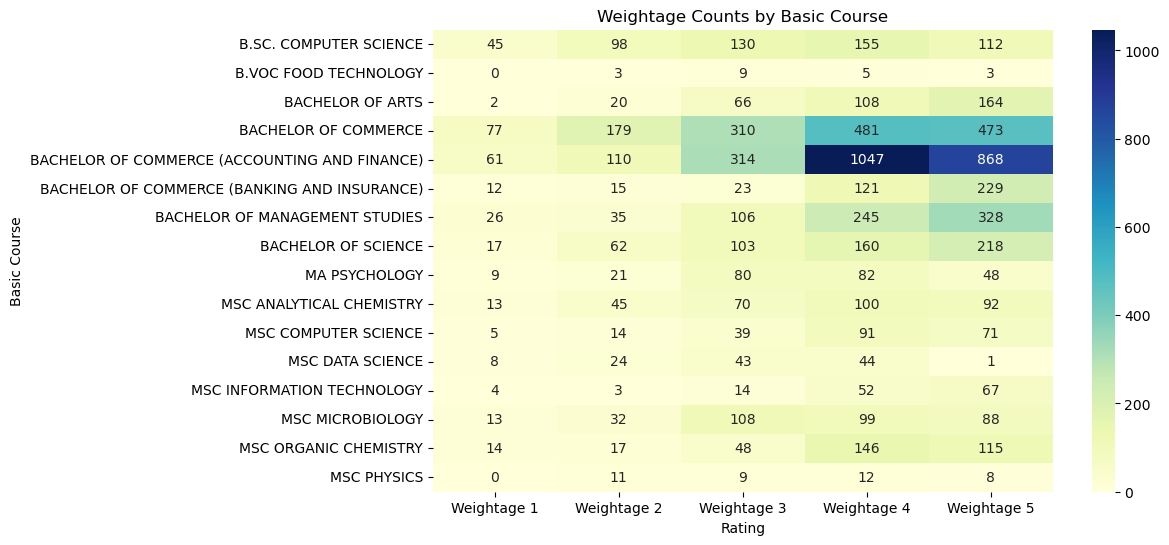

In [157]:
plt.figure(figsize = (10,6))
sns.heatmap(courses[['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']], annot = True,
           cmap = "YlGnBu", fmt = 'g', yticklabels = courses["Basic Course"])
plt.title("Weightage Counts by Basic Course")
plt.xlabel("Rating")
plt.ylabel("Basic Course")

### Key Insights:
### As seen in the above heat map, courses like Bachelor of Commerce programs  and Msc Information Technology received high number of 4s and 5s, indicating a strong positive feedback.
### On the other hand, Msc Data Science, Bsc. Computer Science and B.Voc Food Technology had a notable concentration of lower ratings (1s and 2s), possibly reflecting lower satisfaction or unmet expectations.